# Parametric data exploration

In [1]:
%matplotlib ipympl

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

## Load and align parametric data

### Timing parameters

In [2]:
# User-defined parameters (see TDD file content)
param_path = "Parametric_data/7075_PT_0.1_2_T_tdd.txt"
# param_sampling = 20

### Data loading and pre-processing

In [3]:
# Data reading
datapath = param_path
print("Loading parametric data in "+datapath)
df = pd.read_csv(datapath,sep='\s+', header=0,skiprows=(0,1,2,3,4,5,6),encoding='latin-1')
df = df.rename(columns={'SSSSSSSS.mmmuuun': 'time'})

# Read first line containing datetime
with open(datapath, 'r',encoding='latin-1') as f:
    TOA = f.readline()

# Adding index with absolute time in date format
# timestamp = [str(UTCDateTime(TOA)+t) for t in df.time[:]]
# df['timestamp'] = pd.to_datetime(timestamp) # Absolute time
# df = df.set_index(pd.DatetimeIndex(df['timestamp']))
# df.drop(columns=['ID'], inplace=True, axis=1)

# # Cutting dataframe around stream
# param = df[pd.to_datetime(str(Stream_init_time)):pd.to_datetime(str(Stream_end_time))]

# # # Resampling to fit stream segments 
# param = param.resample(str(loader.segment_duration)+'s',origin='end').interpolate('linear')
param = df
display(param)

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_13217/4044194235.py:4: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(datapath,sep='\s+', header=0,skiprows=(0,1,2,3,4,5,6),encoding='latin-1')


Loading parametric data in Parametric_data/7075_PT_0.1_2_T_tdd.txt


,ID,time,PARA1,PARA2,CYCLES,CH,RMS,ASL,ABS-ENERGY,CH.1,...,ASL.1,ABS-ENERGY.1,CH.2,RMS.2,ASL.2,ABS-ENERGY.2,CH.3,RMS.3,ASL.3,ABS-ENERGY.3
0,2.0,0.009901,810.2417,-31.7383,1.0,1,0.0006,20,74.201,2,...,18,44.519,3.0,0.0006,18.0,42.488,4.0,0.0004,16.0,29.740
1,2.0,0.019901,812.0728,-30.8228,1.0,1,0.0006,20,63.847,2,...,18,41.817,3.0,0.0006,18.0,39.238,4.0,0.0004,16.0,23.438
2,2.0,0.029901,806.2744,-30.5176,1.0,1,0.0006,20,61.695,2,...,18,39.122,3.0,0.0006,18.0,57.960,4.0,0.0004,16.0,24.379
3,2.0,0.039901,806.2744,-31.4331,1.0,1,0.0006,20,76.251,2,...,19,44.694,3.0,0.0006,19.0,56.764,4.0,0.0004,16.0,24.041
4,2.0,0.049901,800.4761,-31.1279,1.0,1,0.0006,21,71.932,2,...,19,41.020,3.0,0.0006,19.0,38.413,4.0,0.0004,16.0,24.516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7990854,2.0,79432.903501,-0.6104,321.9604,12.0,1,0.0004,16,24.911,2,...,15,19.272,3.0,0.0002,14.0,14.591,4.0,0.0004,16.0,21.039
7990855,2.0,79432.913501,1.5259,321.0449,12.0,1,0.0004,16,23.972,2,...,15,19.347,3.0,0.0002,14.0,15.800,4.0,0.0004,16.0,21.456
7990856,2.0,79432.923501,1.2207,321.9604,12.0,1,0.0004,16,24.194,2,...,15,19.791,3.0,0.0002,14.0,15.919,4.0,0.0004,16.0,21.085
7990857,2.0,79432.933501,0.3052,321.6553,12.0,1,0.0004,16,24.236,2,...,15,19.705,3.0,0.0002,14.0,15.614,4.0,0.0004,16.0,21.528


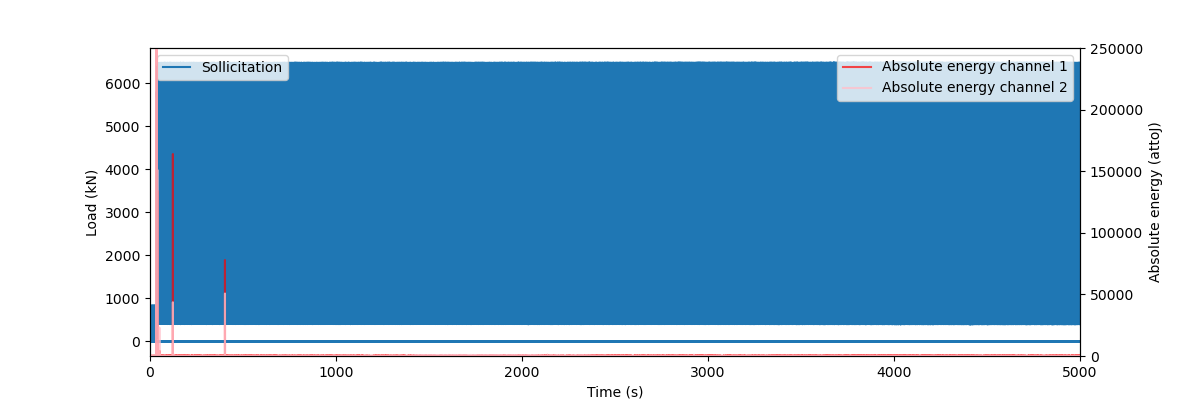

In [4]:
# # Verification plot
fig, ax = plt.subplots(figsize=(12, 4))
# ax.plot(df.timestamp,df.RMS,'-')
# ax.plot(df.index,df.PARA2,'-')
ax2 = ax.twinx()
ax2.set_ylabel('Absolute energy (attoJ)')
ax.set_ylabel('Load (kN)')
ax.set_xlabel('Time (s)')

ax.plot(df.time,df.PARA1,'-',label='Sollicitation')
ax2.plot(df.time,df['ABS-ENERGY'],'-',color='r',alpha=0.7,label='Absolute energy channel 1')
ax2.plot(df.time,df['ABS-ENERGY.1'],'-',color='pink',alpha=0.8,label='Absolute energy channel 2')
ax2.set_ylim([0,2.5e5])
# ax.set_ylim([0,2.5e5])
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
x = 5E3
plt.xlim([0,x])
plt.show()

In [9]:
fig_name = "/home/delaselt/Documents/Acoustic_mining/CT_mart_H/CT_mart_H_1/Param_T_ch12_2"
plt.savefig(fig_name+'.svg')
plt.savefig(fig_name+'.pdf')